# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press

## Chapter 8: Quasi-Newton methods

### Algorithm 8.1: Finite difference Newton's method: one variable

In [6]:
def newtonFinDiffOneVariable(obj,x0,eps,tau,maxiter = 100):
    xk = x0
    # The function returns both f and g. Here, we need only f, so the [0] index.
    f = obj(xk)[0]
    k = 0
    iters = list()
    iters.append([k,xk,f])
    while abs(f) > eps and k < maxiter:
        if (abs(xk)>= 1): 
            s = tau * xk
        else:
            s = tau
        fs = obj(xk+s)[0]
        xk = xk - s * f / (fs - f)
        f = obj(xk)[0]
        k += 1
        iters.append([k,xk,f])
    return(xk,iters)

Example: $F(x)=x^2-2$

In [2]:
def ex0703(x):
    f = x * x - 2.0
    g = 2.0 * x
    return (f,g)

Run the example with $x_0=2$ and $\tau=10^{-7}$

In [11]:
tau = 1.0e-7
(root,iters) = newtonFinDiffOneVariable(ex0703,2.0,1.0e-15,tau)
print("x= {} F(x)={}".format(root,ex0703(root)))

NameError: name 'ex0703' is not defined

Table 8.1, page 204

In [12]:
print("k\txk\t\tF(xk)")
for k in iters:
    print("{0}\t{1:+E}\t{2:+E}".format(*k))

k	xk		F(xk)


NameError: name 'iters' is not defined

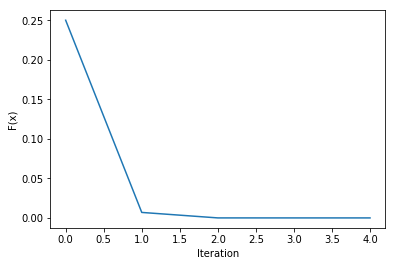

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
table= np.array(iters)
plt.xlabel("Iteration")
plt.ylabel("F(x)")
plt.plot(table[1:,2])
plt.show()

Run the example with $x_0=2$ and $\tau=0.1$

In [6]:
tau = 0.1
(root,iters) = newtonFinDiffOneVariable(ex0703,2.0,1.0e-15,tau)
print("x= {} F(x)={}".format(root,ex0703(root)))

x= 1.4142135623730951 F(x)=(4.440892098500626e-16, 2.8284271247461903)


Table 8.2, page 205

In [7]:
print("k\txk\t\tF(xk)")
for k in iters:
    print("{0}\t{1:+E}\t{2:+E}".format(*k))

k	xk		F(xk)
0	+2.000000E+00	+2.000000E+00
1	+1.523810E+00	+3.219955E-01
2	+1.423186E+00	+2.545822E-02
3	+1.414668E+00	+1.284856E-03
4	+1.414235E+00	+6.137066E-05
5	+1.414215E+00	+2.922839E-06
6	+1.414214E+00	+1.391838E-07
7	+1.414214E+00	+6.627802E-09
8	+1.414214E+00	+3.156098E-10
9	+1.414214E+00	+1.502842E-11
10	+1.414214E+00	+7.154277E-13
11	+1.414214E+00	+3.419487E-14
12	+1.414214E+00	+1.332268E-15
13	+1.414214E+00	+4.440892E-16


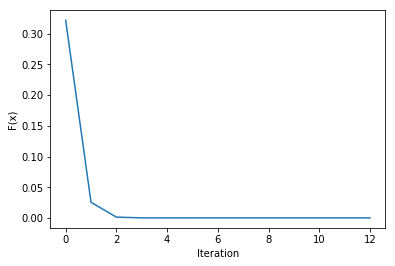

In [8]:
table= np.array(iters)
plt.xlabel("Iteration")
plt.ylabel("F(x)")
plt.plot(table[1:,2])
plt.show()

### Algorithm 8.2: Secant method: one variable


In [9]:
def secantOneVariable(obj,x0,a0,eps,maxiter=100):
    xk = x0
    ak = a0
    f = obj(xk)[0]
    k = 0
    iters = list()
    iters.append([k,xk,f,ak])
    while abs(f) > eps and k < maxiter:
        xold = xk
        xk = xk - f / ak
        fold = f
        f = obj(xk)[0]
        ak = (fold - f) / (xold - xk)
        k += 1
        iters.append([k,xk,f,ak])
    return(xk,iters)

Example: $F(x)=x^2-2$, with $x_0=2$ and $a_0=1$

In [10]:
x0 = 2
a0 = 1
(root,iters) = secantOneVariable(ex0703,x0,a0,1.0e-15)
print("x= {} F(x)={}".format(root,ex0703(root)))

x= 1.4142135623730954 F(x)=(8.881784197001252e-16, 2.8284271247461907)


Table 8.3, page 207

In [11]:
print("k\txk\t\tF(xk)\t\tak")
for k in iters:
    print("{0}\t{1:+E}\t{2:+E}\t{3:+E}".format(*k))

k	xk		F(xk)		ak
0	+2.000000E+00	+2.000000E+00	+1.000000E+00
1	+0.000000E+00	-2.000000E+00	+2.000000E+00
2	+1.000000E+00	-1.000000E+00	+1.000000E+00
3	+2.000000E+00	+2.000000E+00	+3.000000E+00
4	+1.333333E+00	-2.222222E-01	+3.333333E+00
5	+1.400000E+00	-4.000000E-02	+2.733333E+00
6	+1.414634E+00	+1.189768E-03	+2.814634E+00
7	+1.414211E+00	-6.007287E-06	+2.828846E+00
8	+1.414214E+00	-8.931456E-10	+2.828425E+00
9	+1.414214E+00	+8.881784E-16	+2.828427E+00


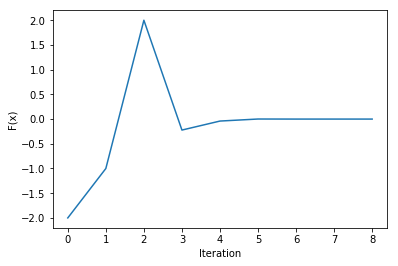

In [12]:
table= np.array(iters)
plt.xlabel("Iteration")
plt.ylabel("F(x)")
plt.plot(table[1:,2])
plt.show()

### Algorithm 8.3: finite difference Newton's method: $n$ variables

In [13]:
import numpy as np
from scipy import linalg
def newtonFinDiffNVariables(obj,x0,tau,eps,maxiter=100):
    n = len(x0)
    xk = x0
    f = obj(xk)[0]
    k = 0
    iters = list()
    iters.append([k,xk,f])
    I = np.eye(n,n)
    while linalg.norm(f) > eps and k < maxiter:
        A = np.empty([n,n])
        for col in range(n):
            xi = xk.item(col)
            if (abs(xi) >= 1):
                s = tau * xi
            elif xi >= 0:
                s = tau
            else:
                s = -tau
            ei = I[col].reshape(n,1)
            fp = obj(xk + s * ei)[0]
            A[:,col:col+1] = (fp - f) / s
        # We need to enforce the column vector shape
        d = linalg.solve(A,-f).reshape(2,1)
        xk = xk + d
        f = obj(xk)[0]
        k += 1
        iters.append([k,xk,f])
    return (xk,iters)

Example: $F(x)=\left(\begin{array}{c}(x_1+1)^2+ x_2^2 - 2 \\ e^{x_1} + x_2^3 - 2 \end{array}\right)$

In [14]:
# Note that the indices of array start at 0, not 1.
def ex0711(x):
    f1 = (x.item(0) + 1) * (x.item(0) + 1) + x.item(1) * x.item(1) - 2
    f2 = np.exp(x.item(0)) + x.item(1) * x.item(1) * x.item(1) - 2
    # Note the double brackets, as the vector must be a matrix with one column
    f = np.array([[f1],[f2]])
    J11 = 2 * (x.item(0) + 1)
    J12 = 2 * x.item(1)
    J21 = np.exp(x.item(0))
    J22 = 3 * x.item(1) * x.item(1)
    J = np.array([ [ J11, J12 ],[J21 ,J22 ]])
    return (f,J)

Run the example with $x_0= \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$ and $\tau=10^{-7}$

In [15]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x0 = np.array([[1,1]]).T
tau = 1.0e-7
(root,iters) = newtonFinDiffNVariables(ex0711,x0,tau,1.0e-15)
# Value at the solution
f = ex0711(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))

x= (-1.1083349994011326e-16,1.0000000000000002) F(x)=(0.0,4.440892098500626e-16)


Table 8.4, page 209

In [16]:
print("k\txk\t\tF(xk)\t\t||F(xk)||")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}".format(iters[k][0],iters[k][1].item(0),iters[k][2].item(0),linalg.norm(iters[k][2])))
    print("  \t{:+E}\t{:+E}".format(iters[k][1].item(1),iters[k][2].item(1)))

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	+1.523592E-01	+7.566298E-01	+1.154709E+00
  	+1.195282E+00	+8.722750E-01
2	-1.083769E-02	+5.196848E-02	+1.140426E-01
  	+1.036111E+00	+1.015135E-01
3	-8.896678E-04	+1.294458E-03	+3.942346E-03
  	+1.001535E+00	+3.723771E-03
4	-1.370169E-06	+3.137520E-06	+8.080614E-06
  	+1.000003E+00	+7.446629E-06
5	-5.688116E-12	+1.094103E-11	+2.986392E-11
  	+1.000000E+00	+2.778755E-11
6	-1.108335E-16	+0.000000E+00	+4.440892E-16
  	+1.000000E+00	+4.440892E-16


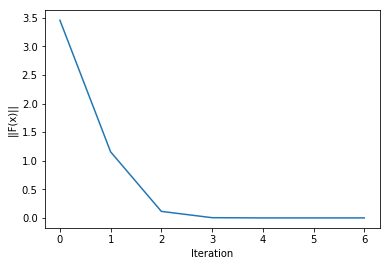

In [17]:
norm = [linalg.norm(iters[k][2]) for k in range(len(iters))]
plt.xlabel("Iteration")
plt.ylabel("||F(x)||")
plt.plot(norm)
plt.show()

Run the example with $x_0= \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$ and $\tau=0.1$

In [18]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x0 = np.array([[1,1]]).T
tau = 0.1
(root,iters) = newtonFinDiffNVariables(ex0711,x0,tau,1.0e-15)
# Value at the solution
f = ex0711(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))

x= (6.238580618425054e-18,1.0) F(x)=(0.0,0.0)


Table 8.5, page 210

In [19]:
print("k\txk\t\tF(xk)\t\t||F(xk)||")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}".format(iters[k][0],iters[k][1].item(0),iters[k][2].item(0),linalg.norm(iters[k][2])))
    print("  \t{:+E}\t{:+E}".format(iters[k][1].item(1),iters[k][2].item(1)))

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	+1.646297E-01	+8.021033E-01	+1.218528E+00
  	+1.202390E+00	+9.173006E-01
2	-1.457411E-02	+8.859858E-02	+1.889729E-01
  	+1.057135E+00	+1.669163E-01
3	-5.723563E-03	+8.214593E-03	+2.525362E-02
  	+1.009767E+00	+2.388024E-02
4	-4.768964E-04	+1.488248E-03	+3.518427E-03
  	+1.001220E+00	+3.188173E-03
5	-6.650782E-05	+1.503511E-04	+3.888142E-04
  	+1.000142E+00	+3.585680E-04
6	-7.022846E-06	+1.850894E-05	+4.572319E-05
  	+1.000016E+00	+4.180944E-05
7	-8.386496E-07	+2.059562E-06	+5.192563E-06
  	+1.000002E+00	+4.766646E-06
8	-9.451126E-08	+2.398182E-07	+5.988650E-07
  	+1.000000E+00	+5.487499E-07
9	-1.093846E-08	+2.733859E-08	+6.857038E-08
  	+1.000000E+00	+6.288481E-08
10	-1.250423E-09	+3.147179E-09	+7.877591E-09
  	+1.000000E+00	+7.221614E-09
11	-1.437612E-10	+3.606582E-10	+9.036054E-10
  	+1.000000E+00	+8.285097E-10
12	-1.648439E-11	+4.141754E-11	+1.037231E-10
  	+1.000000E+00	+9.509504E-11

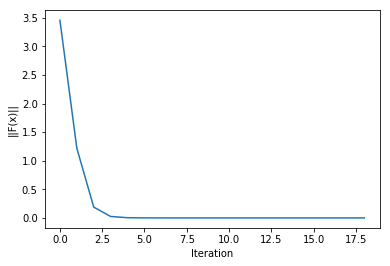

In [20]:
norm = [linalg.norm(iters[k][2]) for k in range(len(iters))]
plt.xlabel("Iteration")
plt.ylabel("||F(x)||")
plt.plot(norm)
plt.show()

### Algorithm 8.4: secant method: $n$ variables

In [21]:
def secantNVariables(obj,x0,eps,maxiter=100):
    n = len(x0)
    xk = x0
    f = obj(xk)[0]
    k = 0
    A = np.eye(n,n)
    iters = list()
    iters.append([k,xk,f,A])
    while linalg.norm(f) > eps and k < maxiter:
        xold = xk
        d = linalg.solve(A,-f).reshape(2,1)
        xk = xk + d
        fold = f
        f = obj(xk)[0]
        y = f-fold
        update = np.outer(y - A.dot(d), d ) / np.inner(d[:,0],d[:,0])
        A = np.add(A,update)
        k += 1
        iters.append([k,xk,f,A])
    return (xk,iters)
   

Example 7.11: $F(x)=\left(\begin{array}{c}(x_1+1)^2+ x_2^2 - 2 \\ e^{x_1} + x_2^3 - 2 \end{array}\right)$, $x_0=\left(\begin{array}{c} 1 \\ 1 \end{array}\right)$


In [22]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x0 = np.array([[1,1]]).T
(root,iters) = secantNVariables(ex0711,x0,1.0e-15)
# Value at the solution
f = ex0711(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))

x= (-1.7137474114864424,1.220886822189675) F(x)=(-2.220446049250313e-16,0.0)


Table 8.6, page 215

In [23]:
print("k\txk\t\tF(xk)\t\t||F(xk)||")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}".format(iters[k][0],iters[k][1].item(0),iters[k][2].item(0),linalg.norm(iters[k][2])))
    print("  \t{:+E}\t{:+E}".format(iters[k][1].item(1),iters[k][2].item(1)))

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	-2.000000E+00	-4.840712E-01	+2.287062E+00
  	-7.182818E-01	-2.235247E+00
2	-1.664500E+00	-8.680087E-01	+1.511178E+00
  	+8.309216E-01	-1.237021E+00
3	-2.425626E-01	+2.725982E+00	+7.741565E+00
  	+2.037712E+00	+7.245747E+00
4	-1.241556E+00	-1.346760E+00	+1.838980E+00
  	+7.712913E-01	-1.252232E+00
5	-5.805217E-01	-1.645775E+00	+2.138259E+00
  	+4.222118E-01	-1.365129E+00
6	-3.261932E+00	+7.270839E+00	+9.756876E+00
  	+2.038260E+00	+6.506268E+00
7	-1.109053E+00	-1.487538E+00	+1.986088E+00
  	+7.075096E-01	-1.315971E+00
8	-1.479062E+00	-9.030118E-01	+1.321012E+00
  	+9.313901E-01	-9.641795E-01
9	-1.832870E+00	+3.276810E-01	+4.113589E-01
  	+1.278283E+00	+2.486791E-01
10	-1.707157E+00	-8.164065E-02	+1.531300E-01
  	+1.190919E+00	-1.295515E-01
11	-1.709528E+00	-2.136459E-02	+3.466046E-02
  	+1.214580E+00	-2.729289E-02
12	-1.714002E+00	+2.444559E-03	+4.491289E-03
  	+1.221739E+00	+3.767733E-03

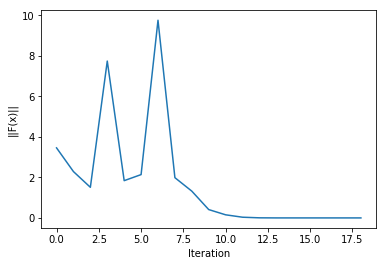

In [24]:
norm = [linalg.norm(iters[k][2]) for k in range(len(iters))]
plt.xlabel("Iteration")
plt.ylabel("||F(x)||")
plt.plot(norm)
plt.show()

Table 8.7, page 215.

In [25]:
for k in range(len(iters)):
    x = iters[k][1]
    A = iters[k][3]
    J = ex0711(x)[1]
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k,J[0,0],J[0,1],A[0,0],A[0,1]))
    print("  \t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(J[1,0],J[1,1],A[1,0],A[1,1]))


0	+4.000000E+00	+2.000000E+00	+1.000000E+00	+0.000000E+00
  	+2.718282E+00	+3.000000E+00	+0.000000E+00	+1.000000E+00
1	-2.000000E+00	-1.436564E+00	+1.121499E+00	+6.958973E-02
  	+1.353353E-01	+1.547786E+00	+5.610329E-01	+1.321338E+00
2	-1.329001E+00	+1.661843E+00	+1.005596E+00	-4.656036E-01
  	+1.892852E-01	+2.071292E+00	+3.958567E-01	+5.586201E-01
3	+1.514875E+00	+4.075424E+00	+2.120000E+00	+4.801851E-01
  	+7.846147E-01	+1.245681E+01	+3.357979E+00	+3.072556E+00
4	-4.831116E-01	+1.542583E+00	+2.637104E+00	+1.135716E+00
  	+2.889343E-01	+1.784671E+00	+3.838787E+00	+3.682075E+00
5	+8.389567E-01	+8.444236E-01	+6.903080E-01	+2.163781E+00
  	+5.596064E-01	+5.347884E-01	+2.223969E+00	+4.534830E+00
6	-4.523864E+00	+4.076519E+00	-1.298771E+00	+3.362571E+00
  	+3.831430E-02	+1.246351E+01	+4.440528E-01	+5.607560E+00
7	-2.181055E-01	+1.415019E+00	-1.798708E+00	+3.671595E+00
  	+3.298713E-01	+1.501710E+00	+1.776645E-03	+5.880942E+00
8	-9.581246E-01	+1.862780E+00	-1.223640E-02	+2.590660E+00
  	+2.